<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_4/demo_YOLOv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Yolo_Week4

/content/gdrive/MyDrive/Yolo_Week4


In [4]:
#!git clone https://github.com/AlexeyAB/darknet.git

In [5]:
!chmod 755 -R /content/gdrive/MyDrive/Yolo_Week4/darknet

In [7]:
%cd /content/gdrive/MyDrive/Yolo_Week4/darknet

/content/gdrive/MyDrive/Yolo_Week4/darknet


In [8]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [9]:
%ls

3rdparty/                darknet_video.py*       obj/
build/                   data/                   predictions.jpg*
build.ps1*               image_yolov3.sh*        README.md*
cfg/                     image_yolov4.sh*        results/
cmake/                   include/                scripts/
CMakeLists.txt*          json_mjpeg_streams.sh*  src/
darknet*                 LICENSE*                vcpkg.json*
DarknetConfig.cmake.in*  Makefile*               video_yolov3.sh*
darknet_images.py*       net_cam_v3.sh*          video_yolov4.sh*
darknet.py*              net_cam_v4.sh*          yolov4.weights*


In [10]:
#Su dung neu cai lai tu dau
#!make
#!wgethttps://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def imShow(path):
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

In [13]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

 CUDA-version: 11010 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 B

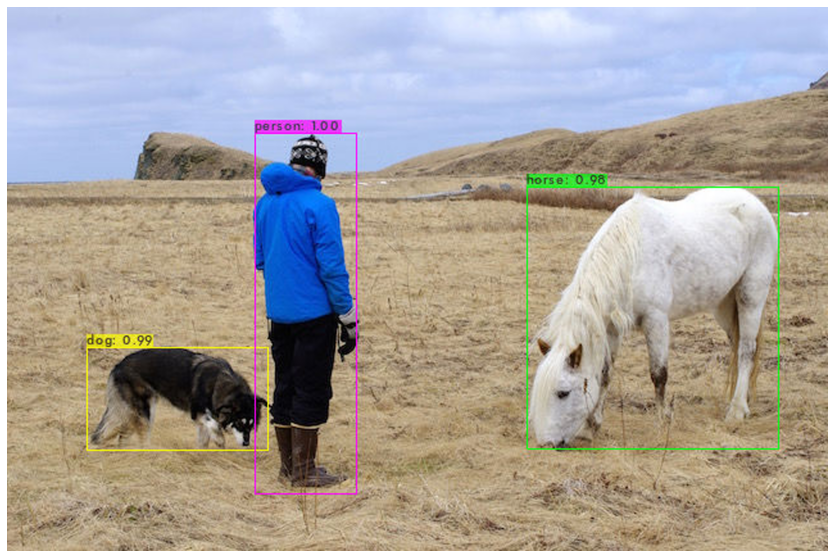

In [16]:
imShow('predictions.jpg')

In [21]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/Types-of-Cockatoos.jpeg

 CUDA-version: 11010 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 B

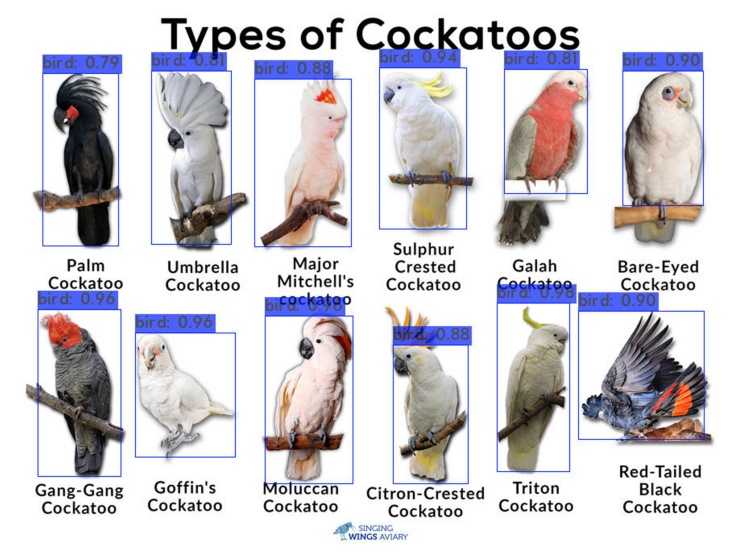

In [22]:
imShow('predictions.jpg')

In [25]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show '/content/gdrive/MyDrive/Yolo_Week4/y2mate.com - Wild Goffin Cockatoo_360p.mp4' -i 0 -out_filename /content/gdrive/MyDrive/Yolo_Week4/predictions.mp4

Streaming output truncated to the last 5000 lines.

 cvWriteFrame 
Objects:

bird: 96% 
bird: 83% 
bird: 69% 
bird: 48% 

FPS:8.5 	 AVG_FPS:8.5

 cvWriteFrame 
Objects:

bird: 96% 
bird: 96% 
bird: 86% 
bird: 81% 
bird: 33% 

FPS:8.6 	 AVG_FPS:8.6

 cvWriteFrame 
Objects:

bird: 97% 
bird: 91% 
bird: 85% 
bird: 35% 

FPS:8.6 	 AVG_FPS:8.6

 cvWriteFrame 
Objects:

tvmonitor: 39% 
bird: 95% 
bird: 94% 
bird: 78% 
bird: 57% 
bird: 51% 

FPS:8.6 	 AVG_FPS:8.6

 cvWriteFrame 
Objects:

bird: 97% 
bird: 97% 
bird: 96% 
bird: 89% 
bird: 76% 
bird: 32% 

FPS:8.6 	 AVG_FPS:8.6

 cvWriteFrame 
Objects:

tvmonitor: 31% 
bird: 97% 
bird: 95% 
bird: 93% 
bird: 82% 
bird: 80% 
bird: 28% 

FPS:8.6 	 AVG_FPS:8.6

 cvWriteFrame 
Objects:

tvmonitor: 30% 
bird: 95% 
bird: 94% 
bird: 93% 
bird: 93% 
bird: 53% 
bird: 27% 

FPS:8.6 	 AVG_FPS:8.6

 cvWriteFrame 
Objects:

bird: 96% 
bird: 95% 
bird: 94% 
bird: 94% 
bird: 90% 
bird: 28% 

FPS:8.6 	 AVG_FPS:8.6

 cvWriteFrame 
Objects:

bird: 97% 
bird: 96% 